# BELTRANS translation statistics

This notebook displays statistics about the book translations in the BELTRANS corpus. It aims to measure the improvement performed by different data integration or enrichment techniques.


In [1]:
import pandas as pd
import sys, os

sys.path.insert(1, os.pardir)
import utils
import utils_stats
import utils_plot

## Existing measurements

The measured statistics currently evolve like this:



In [2]:
translationMeasurementFiles = [
    '2022-05-03_translation-stats.csv', '2022-05-09_translation-stats.csv', 
    '2022-05-23_translation-stats.csv', '2022-06-07_translation-stats.csv',
    '2022-06-16_translation-stats.csv', '2022-06-20_translation-stats.csv',
    '2022-06-23_translation-stats.csv', '2022-06-24_translation-stats.csv',
    '2022-07-18_translation-stats.csv', '2022-07-20_translation-stats.csv',
    '2022-07-21_translation-stats.csv', '2022-07-25_translation-stats.csv',
    '2022-07-26_translation-stats.csv', '2022-07-27_translation-stats.csv',
    '2022-08-08_translation-stats.csv', '2022-08-11_translation-stats.csv',
    '2022-08-18_translation-stats.csv', '2022-09-05_translation-stats.csv',
    '2022-09-07_translation-stats.csv', '2022-09-08_translation-stats.csv'
]

In [3]:
translationStats = utils_stats.mergeMeasurementsToDataFrame('./measurements', translationMeasurementFiles)
statsFRNL = translationStats[translationStats['corpus'] == 'FR-NL'].copy()
statsNLFR = translationStats[translationStats['corpus'] == 'NL-FR'].copy()
statsOther = translationStats[translationStats['corpus'] == 'OTHER'].copy()

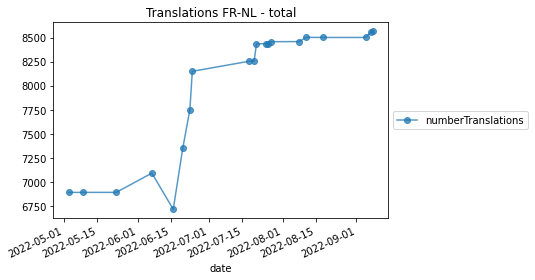

In [4]:
utils_plot.plotNumberTimeline(statsFRNL,
                                  ['numberTranslations'],
                                  'Translations FR-NL - total')

In [5]:
statsFRNL[['numberTranslations', 'comment']].sort_index()

,numberTranslations,comment
date,,
2022-05-03,6891,"Data integrated from KBR, BnF and KB based on ..."
2022-05-09,6891,"Data integrated from KBR, BnF and KB based on ..."
2022-05-23,6891,No changes to previous version.
2022-06-07,7091,Added publishing directors and included a coll...
2022-06-16,6715,Removed duplicate manifestations with the same...
2022-06-20,7350,New KBR data dump with plenty of additions and...
2022-06-23,7752,No ISBN duplicate removal anymore to prevent d...
2022-06-24,8149,"New KBR dump with old Dutch, old French and mi..."
2022-07-18,8254,Dataprofile query filtering also for Belgian o...


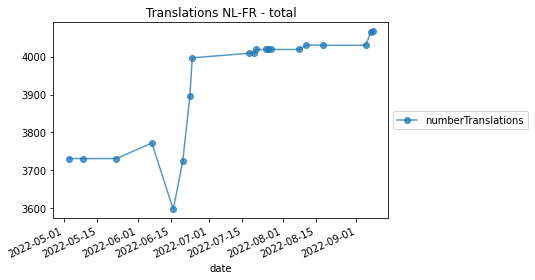

In [6]:
utils_plot.plotNumberTimeline(statsNLFR,
                                  ['numberTranslations'],
                                  'Translations NL-FR - total')

In [7]:
statsNLFR[['numberTranslations']].sort_index()

,numberTranslations
date,
2022-05-03,3731
2022-05-09,3731
2022-05-23,3731
2022-06-07,3772
2022-06-16,3597
2022-06-20,3724
2022-06-23,3897
2022-06-24,3997
2022-07-18,4009


## Identifiers
The total number of translations and how much have which third party identifier.

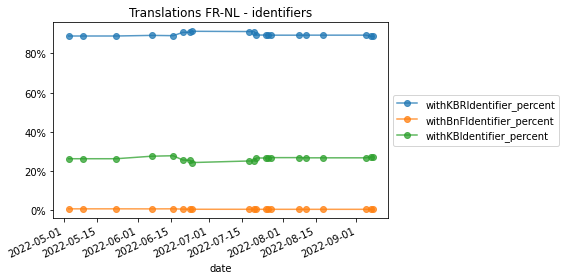

In [8]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier'],
                                  'Translations FR-NL - identifiers',
                                 'numberTranslations')

In [9]:
statsFRNL[['numberTranslations', 'withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier']]

,numberTranslations,withKBRIdentifier,withBnFIdentifier,withKBIdentifier
date,,,,
2022-05-03,6891,6125,58,1817
2022-05-09,6891,6125,58,1817
2022-05-23,6891,6125,58,1817
2022-06-07,7091,6325,58,1961
2022-06-16,6715,5980,57,1873
2022-06-20,7350,6669,51,1890
2022-06-23,7752,7040,52,1983
2022-06-24,8149,7439,51,1990
2022-07-18,8254,7524,51,2082


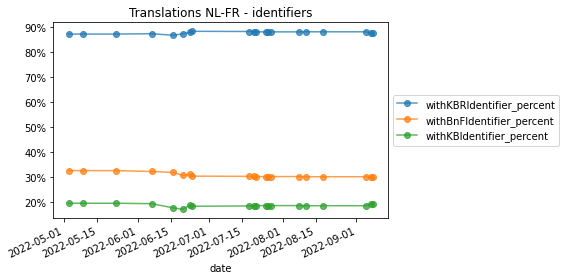

In [10]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier'],
                                  'Translations NL-FR - identifiers',
                                 'numberTranslations')

In [11]:
statsNLFR[['numberTranslations', 'withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier']]

,numberTranslations,withKBRIdentifier,withBnFIdentifier,withKBIdentifier
date,,,,
2022-05-03,3731,3249,1211,724
2022-05-09,3731,3249,1211,724
2022-05-23,3731,3249,1211,724
2022-06-07,3772,3290,1211,725
2022-06-16,3597,3115,1141,631
2022-06-20,3724,3247,1136,632
2022-06-23,3897,3420,1207,728
2022-06-24,3997,3525,1209,727
2022-07-18,4009,3532,1209,735


In [ ]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier',
                                  'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations FR-NL - identifier overlap',
                                 'numberTranslations')

In [ ]:
statsFRNL[['numberTranslations', 'withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier', 'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier']]

Because of the outlier KBR&KB below a graph without that line

In [ ]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations FR-NL - identifier overlap (without KBR&KB)',
                                 'numberTranslations')

In [ ]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

In [ ]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier',
                                  'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations NL-FR - identifier overlap',
                                 'numberTranslations')

In [ ]:
statsNLFR[['numberTranslations', 'withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier', 'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier']]

## ISBN identifiers
The total number of translations and how many have ISBN10/ISBN13.

In [ ]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withTargetISBN10', 'withTargetISBN13'],
                                  'Translations FR-NL - ISBN',
                                 'numberTranslations')

In [ ]:
statsFRNL[['numberTranslations', 'withTargetISBN10', 'withTargetISBN13']]

In [ ]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withTargetISBN10', 'withTargetISBN13'],
                                  'Translations NL-FR - ISBN',
                                 'numberTranslations')

In [ ]:
statsNLFR[['numberTranslations', 'withTargetISBN10', 'withTargetISBN13']]

## Information about original of translation (source)
The total number of translation and for how many we have which kind of information for the original.

In [ ]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRSourceTitle', 'withKBSourceTitle', 'withSourceKBRIdentifier', 'withSourceISBN10', 'withSourceISBN13'],
                                  'Translations FR-NL - source info',
                                 'numberTranslations')

In [ ]:
statsFRNL[['numberTranslations', 'withKBRIdentifier', 'withKBRSourceTitle', 'withKBSourceTitle', 'withSourceKBRIdentifier', 'withSourceISBN10', 'withSourceISBN13']]

In [ ]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

In [ ]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRSourceTitle', 'withKBSourceTitle', 'withSourceKBRIdentifier', 'withSourceISBN10', 'withSourceISBN13'],
                                  'Translations NL-FR - source info',
                                 'numberTranslations')

In [ ]:
statsNLFR[['numberTranslations', 'withKBRIdentifier', 'withKBRSourceTitle', 'withKBSourceTitle', 'withSourceKBRIdentifier', 'withSourceISBN10', 'withSourceISBN13']]

In [ ]:
statsNLFR

In [ ]:
statsFRNL

## All statistics for the 'other' corpus
Compared to above things are only in one graph

In [ ]:
utils_plot.plotTranslationStats(statsOther, 'Translations Other')

In [ ]:
statsOther